In [1]:
import numpy as np
from numpy import exp,log,e
import matplotlib.pyplot as plt

In [ ]:
def Simulation(velocity=np.array([[5],[0]]),drag=1,interval=0.001,timeLength=4):
    position=np.zeros((2,1))
    gravity=np.array([[0],[-9.81]])
    output=[]
    for i in range(int(timeLength/interval+1)):
        position+=velocity*interval
        output.append(position.copy())
        velocity=(velocity+gravity*interval)*(1-drag*interval)
    output=np.array(output).reshape((-1,2))
    return output.T
def LambertWFunction(z,principal=True):
    if z>=0:
        w=0.75*log(z+1)
    elif principal and -1/e<=z<0:
        w=(e*z+1)**0.42-1
    elif not principal and -1/e<=z<0:
        w=log(-z)
    else:
        # print(z,'is less than -1/e=',-1/e)
        return -1
    threshold=0.001
    for i in range(10):
        w=(exp(w)*w**2+z)/(exp(w)*(w+1))
        if z>=0 and z*(1-threshold)<w*exp(w)<z*(1+threshold):
            break
        if z<0 and z*(1+threshold)<w*exp(w)<z*(1-threshold):
            break
    return w
def HorizontalProjectileMotion(v0,dy,drag=1):
    vT=-9.81/drag
    dx=v0/drag*(1+LambertWFunction(-exp((-drag*dy-vT)/vT)))
    return dx
def HorizontalProjectileDerivative(v0,dx,dy,drag=1):
    vT=-9.81/drag
    return dx*drag*vT/v0**2*exp(drag/v0*dx+drag/vT*dy)
def MaximumHeightPlusDistance(v0,drag=1):
    vT=-9.81/drag
    return (v0+vT*log(1-v0/vT))/drag
def Prediction(v0,dx,dy,drag=1):
    vT=-9.81/drag
    r_iv=v0/vT-1
    r_ic=(-drag*(dy+dx)+v0-vT)/vT
    v_i=1-1/r_iv*LambertWFunction(r_iv*exp(r_ic))
    vx=drag*dx/v_i
    
    v_i=1-1/r_iv*LambertWFunction(r_iv*exp(r_ic),False)
    vx1=drag*dx/v_i
    
    r_iv2=-v0/vT-1
    r_ic2=(-drag*(dy-dx)-v0-vT)/vT
    v_i2=1-1/r_iv2*LambertWFunction(r_iv2*exp(r_ic2))
    vx2=drag*dx/v_i2
    
    if dx<=HorizontalProjectileMotion(v0,dy,drag):
        return vx,v0-vx,vx2,vx2-v0
    elif dx<=-dy+MaximumHeightPlusDistance(v0,drag) and HorizontalProjectileDerivative(v0,dx,dy,drag)>-1:
        return vx,v0-vx,vx1,v0-vx1
    else:
        return 0,0,0,0

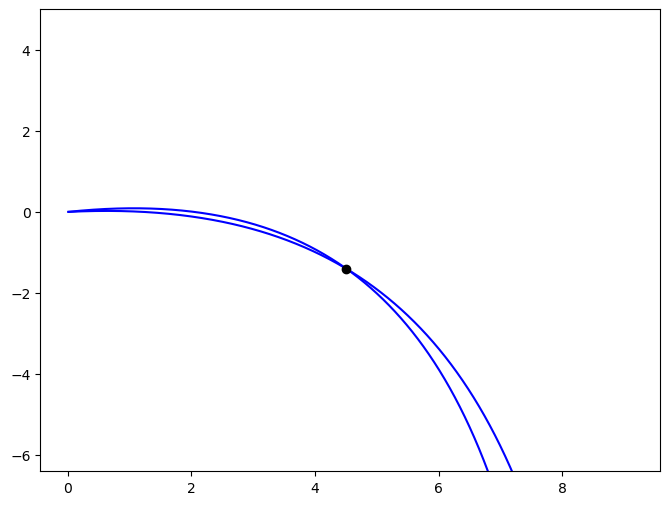

In [15]:
dx,dy=4.5,-1.4
vx1,vy1,vx2,vy2=Prediction(10,dx,dy)
plt.figure(figsize=(8,6))
positionX,positionY=Simulation(np.array([[vx1],[vy1]]))
plt.plot(positionX,positionY, 'b')
positionX,positionY=Simulation(np.array([[vx2],[vy2]]))
plt.plot(positionX,positionY, 'b')
plt.plot([dx], [dy], 'ko')
plt.ylim(dy-5, 5)
plt.show()

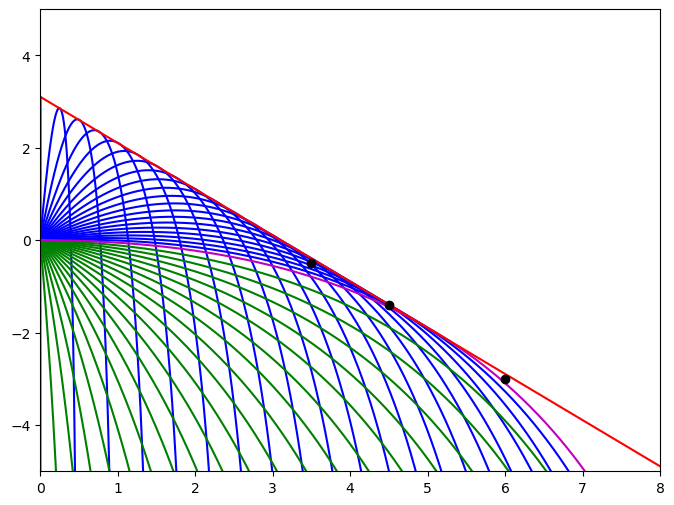

In [5]:
v_0=10
threshold=MaximumHeightPlusDistance(v_0)
plt.figure(figsize=(8,6))
for i in np.linspace(0,v_0,20,endpoint=False):
    positionX,positionY=Simulation(np.array([[i],[v_0-i]]))
    plt.plot(positionX,positionY, 'b')
for i in np.linspace(0,v_0,20,endpoint=False):
    positionX,positionY=Simulation(np.array([[i],[i-v_0]]))
    plt.plot(positionX,positionY, 'g')
positionX,positionY=Simulation(np.array([[v_0],[0]]))
plt.plot(positionX,positionY, 'm')
plt.plot([0,threshold,threshold*3],[threshold,0,-2*threshold],'r')
plt.plot([3.5,4.5,6], [-0.5,-1.4,-3], 'ko')
plt.xlim(0, 8)
plt.ylim(-5, 5)
plt.show()